In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [2]:
from matplotlib.colors import LogNorm
from copy import copy
material = "_quartz"

from LoadMultiFiles import LoadOneFileUproot
from FunctionFor_dE_dx import GetDirForNoOpticalAnalyze

dir_ion = {"name": ["H_2", "He_4","Li_6", "B_10", "C_12", "N_14","O_16", "F_18", "Ne_20", "Na_22"],
           "dE/dx":[0.336700337,	1.262626263,2.946127946,8.164983165,11.95286195,16.32996633,21.38047138,27.35690236,33.67003367,41.16161616]}
dir_ion["n_u"] = [name.split("_")[1] for name in dir_ion["name"]]

list_filter = ["step_x","step_y", "step_z",'Edep_event', 'xyz_center', 'step_trackID','step_isCherenkov',
                'step_chamberID']

dir_diff_isotopes = {}
dir_pdgID_certain = {}
dir_LS_diff_ion = {}
n_to_plot = 20

for i_fig,name_ion in enumerate(dir_ion["name"][:n_to_plot]):
    path_file = f"/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_BeamCertain/root/{name_ion}.root"
    print(path_file)
    dir_events = LoadOneFileUproot(path_file, name_branch="GdLS_log", list_branch_filter=list_filter)
    dir_LS_diff_ion[name_ion] = copy(dir_events)
    dir_geninfo = LoadOneFileUproot(path_file, name_branch="genInfo")
    pdgID_certain,dir_dE_dx =GetDirForNoOpticalAnalyze(dir_events,dir_geninfo)
    dir_dE_dx["n_u"] = dir_ion["n_u"][i_fig]
    dir_diff_isotopes[name_ion] = copy(dir_dE_dx)
    dir_pdgID_certain[name_ion] = pdgID_certain

/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_BeamCertain/root/H_2.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_BeamCertain/root/He_4.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_BeamCertain/root/Li_6.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_BeamCertain/root/B_10.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_BeamCertain/root/C_12.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_BeamCertain/root/N_14.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_BeamCertain/root/O_16.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_BeamCertain/root/F_18.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_BeamCertain/root/Ne_20.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_BeamCertain/root/Na_22.root


dict_keys(['evtID', 'step_pdgID', 'step_t', 'step_Edep', 'step_Equench', 'step_KineticE', 'step_dx'])
1000010020
1000020040
1000030060
1000050100
1000060120
1000070140
1000080160
1000090180
1000100200
1000110220


Text(0.5, 0, 'Kinetic Energy [ MeV ]')

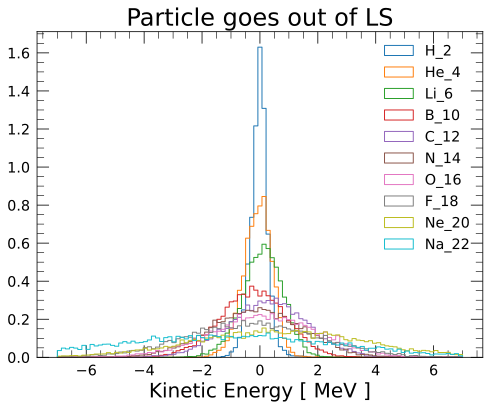

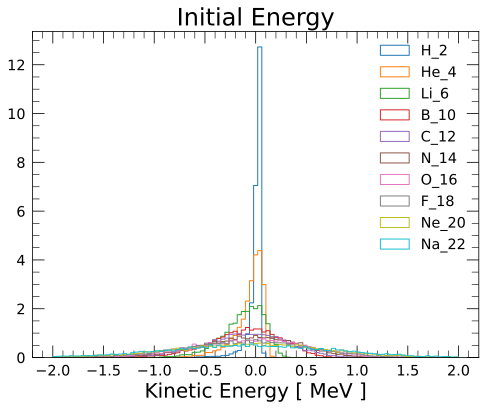

In [3]:
%load_ext autoreload

%autoreload 2

from collections import Counter
from HistTools import GetMaxArgOfHist
print(dir_events.keys())

dir_BeamE_out = {}
dir_BeamE_init = {}

plt.figure("BeamE_init")
plt.figure("BeamE_out")

from GetPhysicsProperty import NameToPDGID
for name_ion, dir_LS in dir_LS_diff_ion.items():
    v_BeamE_init = []
    v_BeamE_out = []
    print(dir_pdgID_certain[name_ion])
    for i,v_t in enumerate(dir_LS["step_t"]):
        index_pdgID = (dir_LS["step_pdgID"][i]==int(NameToPDGID(name_ion)))

        if not np.any(index_pdgID):
            continue
        v_BeamE_init.append(dir_LS["step_KineticE"][i][index_pdgID][np.argmin(v_t[index_pdgID])])
        v_BeamE_out.append(dir_LS["step_KineticE"][i][index_pdgID][np.argmax(v_t[index_pdgID])])
    v_BeamE_init = np.array(v_BeamE_init)
    v_BeamE_out = np.array(v_BeamE_out)

    plt.figure("BeamE_init")
    mean_v_BeamE = np.mean(v_BeamE_init)
    plt.hist(v_BeamE_init-GetMaxArgOfHist(v_BeamE_init, bins=np.linspace(mean_v_BeamE-3, mean_v_BeamE+3, 100)), bins=np.linspace(-2, 2,100), label=name_ion,histtype="step",density=True)
    # plt.semilogy()
    dir_BeamE_init[name_ion] = v_BeamE_init

    plt.figure("BeamE_out")
    # plt.figure()
    plt.hist(v_BeamE_out-GetMaxArgOfHist(v_BeamE_out, bins=2000), bins=np.linspace(-7, 7, 100), label=name_ion, histtype="step",
             density=True)
    dir_BeamE_out[name_ion] = v_BeamE_out
    # plt.hist(v_BeamE_out, bins=np.linspace(-2, 2, 100), label=name_ion, histtype="step")

plt.legend()
plt.title("Particle goes out of LS")
plt.xlabel("Kinetic Energy [ MeV ]")
plt.figure("BeamE_init")
plt.legend()
plt.title("Initial Energy")
plt.xlabel("Kinetic Energy [ MeV ]")


In [4]:
from RooFitTools import FitFromArray
for name_ion, v_BeamE_init in dir_BeamE_init.items():
    FitFromArray(v_BeamE_init[v_BeamE_init>np.max(v_BeamE_init)*0.01])
    break

OBJ: TStyle	dybStyle	Daya Bay Style : 0 at: 0x56000fdc8090
Welcome to JupyROOT 6.24/00
498.58295156398674
----------> Set RooRealVar x

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

-----------> Construct Signal pdf
----------> Generate RooDataset
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(x) TTree Float_t branch x will be converted to double precision.
----------> Set Range for x
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #8671 because x cannot accommodate the value 498.621
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 1 out-of-range events
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'signal' created with bounds [498.509,498.657]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_gx_data) constructing 

In [5]:
path_save = "/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_BeamCertain/"
np.savez(path_save+"BeamEnergySmear"+material+".npz", dir_BeamE_init=dir_BeamE_init, dir_BeamE_out=dir_BeamE_out)